In [1]:
!pip install "stable-baselines3[extra]>=2.0.0a4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.5/183.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.8 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=2c1f9e6c41b39b95a000bc0187bda1571f5ecb79e30a1fe5c646e619dc3c0ea4
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [2]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


In [3]:
# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("SpaceInvaders-v4", n_envs=8, seed=0) # SpaceInvaders-v4 "SpaceInvadersNoFrameskip-v4"
# Stack 4 frames
vec_env = VecFrameStack(env, n_stack=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
models_dir = "models/PPO"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [5]:
from stable_baselines3.common.callbacks import CheckpointCallback
# Save a checkpoint every 2_000_000 steps
# n_envs=8, so save_freq=250_000*n_envs=8 = 2_000_000
checkpoint_callback = CheckpointCallback(save_freq=250000, save_path="./gdrive/MyDrive/models/PPO",
                                         name_prefix="ppo_spaceInvadersFrameSkipWinningParams")

In [6]:
model = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersFrameSkipWinningParams_106000000_steps", verbose=1, tensorboard_log="./gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
                 force_reset=False)
model.set_env(vec_env)


Wrapping the env in a VecTransposeImage.


In [ ]:
model = PPO("CnnPolicy", vec_env, verbose=1, tensorboard_log="./gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
            batch_size=256,
            clip_range=0.001,
            ent_coef=0.01,
            learning_rate=0.0001,
            n_epochs=4,
            n_steps=128,
            vf_coef=0.5
            )

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=34000000, callback=[checkpoint_callback], reset_num_timesteps=False)

Streaming output truncated to the last 5000 lines.
|    value_loss           | 3.15         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 3.89e+03     |
|    ep_rew_mean          | 2.87e+03     |
| time/                   |              |
|    fps                  | 361          |
|    iterations           | 29647        |
|    time_elapsed         | 84023        |
|    total_timesteps      | 136358528    |
| train/                  |              |
|    approx_kl            | 0.0017255018 |
|    clip_fraction        | 0.802        |
|    clip_range           | 0.001        |
|    entropy_loss         | -0.857       |
|    explained_variance   | 0.647        |
|    learning_rate        | 0.0001       |
|    loss                 | 2.36         |
|    n_updates            | 532636       |
|    policy_gradient_loss | 0.00311      |
|    value_loss           | 5.93         |
---

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_wFrameSkip = model
model_wFrameSkip.set_env(vec_env)

ep_reward_wFrameSkip, ep_len_wFrameSkip = evaluate_policy(model, vec_env, n_eval_episodes=300, return_episode_rewards=True, deterministic=False)

Wrapping the env in a VecTransposeImage.


In [ ]:
modelNoFrameSkip = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersLvl4Train_9989760_steps", verbose=1, tensorboard_log="./gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
                 force_reset=False)
modelNoFrameSkip.set_env(vec_env)

ep_reward_noFrameSkip, ep_len_noFrameSkip = evaluate_policy(model, vec_env, n_eval_episodes=300, return_episode_rewards=True, deterministic=False)



Wrapping the env in a VecTransposeImage.


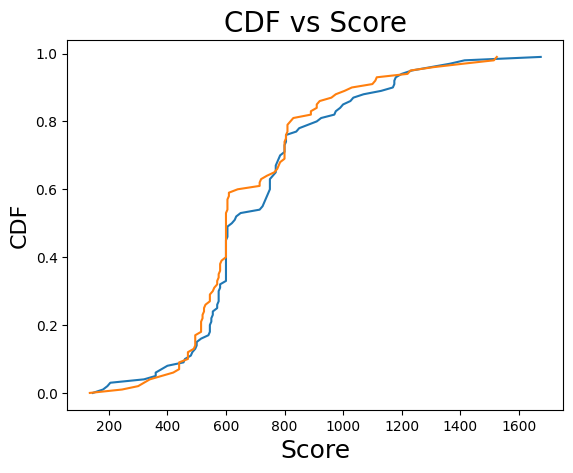

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes=300
X1 = np.sort(ep_reward_wFrameSkip)
X2 = np.sort(ep_reward_noFrameSkip)
F1 = np.array(range(N))/float(N)
F2 = np.array(range(N))/float(N)

plt.plot(X1, F1)
plt.plot(X2, F2)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

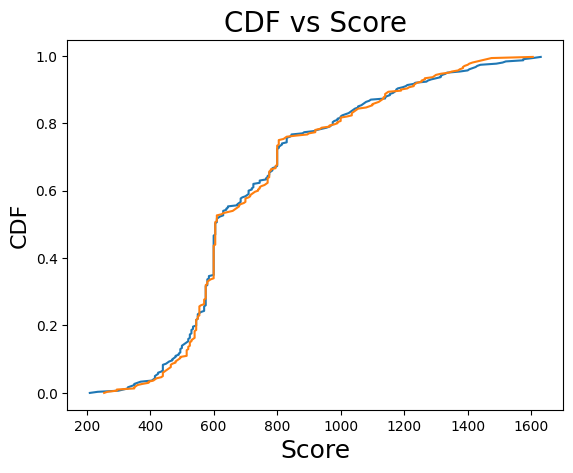

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes=300
X1 = np.sort(ep_reward_wFrameSkip)
X2 = np.sort(ep_reward_noFrameSkip)
F1 = np.array(range(N))/float(N)
F2 = np.array(range(N))/float(N)

plt.plot(X1, F1)
plt.plot(X2, F2)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()